# League of legends winner predicition

## Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

### Data understanding

In [3]:
# Import the data
df = pd.read_csv('./lol_challenger_games_data.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:", df.dtypes)

Dataset Shape: (26904, 26)

Columns: ['game_id', 'game_duration', 'wins', 'first_blood', 'first_tower', 'first_baron', 'first_dragon', 'first_inhibitor', 'dragon_kills', 'baron_kills', 'tower_kills', 'inhibitor_kills', 'ward_placed', 'wardkills', 'kills', 'death', 'assist', 'champion_damage_dealt', 'total_gold', 'total_minion_kills', 'total_level', 'avg_level', 'jungle_minion_kills', 'killing_spree', 'total_heal', 'object_damage_dealt']

Data Types: game_id                    int64
game_duration              int64
wins                       int64
first_blood                int64
first_tower                int64
first_baron                int64
first_dragon               int64
first_inhibitor            int64
dragon_kills               int64
baron_kills                int64
tower_kills                int64
inhibitor_kills            int64
ward_placed                int64
wardkills                  int64
kills                      int64
death                      int64
assist            

* This data contains key information that can affect the win or loss in the game.

* League of Legends includes objects, champions, and minions.

* Objects here represent dragons, barons, messengers, towers, suppressors, and more.

* The heart of the data is the result of the match between the blue and red teams.

* Therefore, the factor analysis that affects the win or loss of the game and the methodology to predict the win or loss of the game will be the most important points in analyzing the data.

### Data Quality Assesment

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:")
print(missing_values)
print("\nMissing Percentage:")
print(missing_percentage)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Check for outliers in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

Missing Values:
game_id                  0
game_duration            0
wins                     0
first_blood              0
first_tower              0
first_baron              0
first_dragon             0
first_inhibitor          0
dragon_kills             0
baron_kills              0
tower_kills              0
inhibitor_kills          0
ward_placed              0
wardkills                0
kills                    0
death                    0
assist                   0
champion_damage_dealt    0
total_gold               0
total_minion_kills       0
total_level              0
avg_level                0
jungle_minion_kills      0
killing_spree            0
total_heal               0
object_damage_dealt      0
dtype: int64

Missing Percentage:
game_id                  0.0
game_duration            0.0
wins                     0.0
first_blood              0.0
first_tower              0.0
first_baron              0.0
first_dragon             0.0
first_inhibitor          0.0
dragon_kills    

### Target Variable Analysis

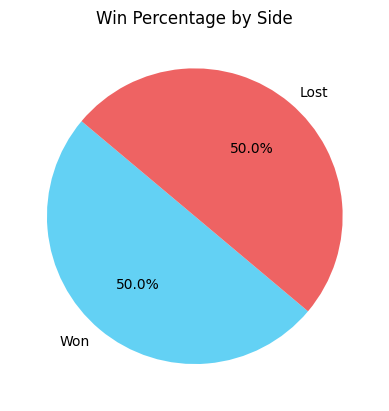

In [5]:
colors = ['#63D1F4', '#EE6363']
labels = ["Won", "Lost"]
winCounts = df["wins"].value_counts()
sizes = [winCounts[0], winCounts[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

### Game Duration Analysis

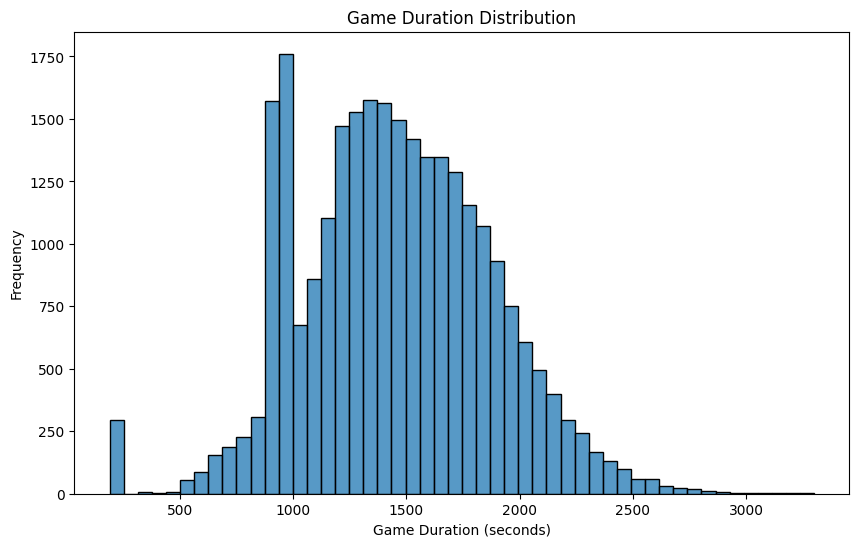

Average Game Duration by Winner: wins
0    1449.251450
1    1448.056043
Name: game_duration, dtype: float64


In [6]:
# Analyze game duration patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='game_duration', bins=50)
plt.title('Game Duration Distribution')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Calculate average game duration by winner
duration_by_winner = df.groupby('wins')['game_duration'].mean()
print(f"Average Game Duration by Winner: {duration_by_winner}")

### Team performance metrics distribution

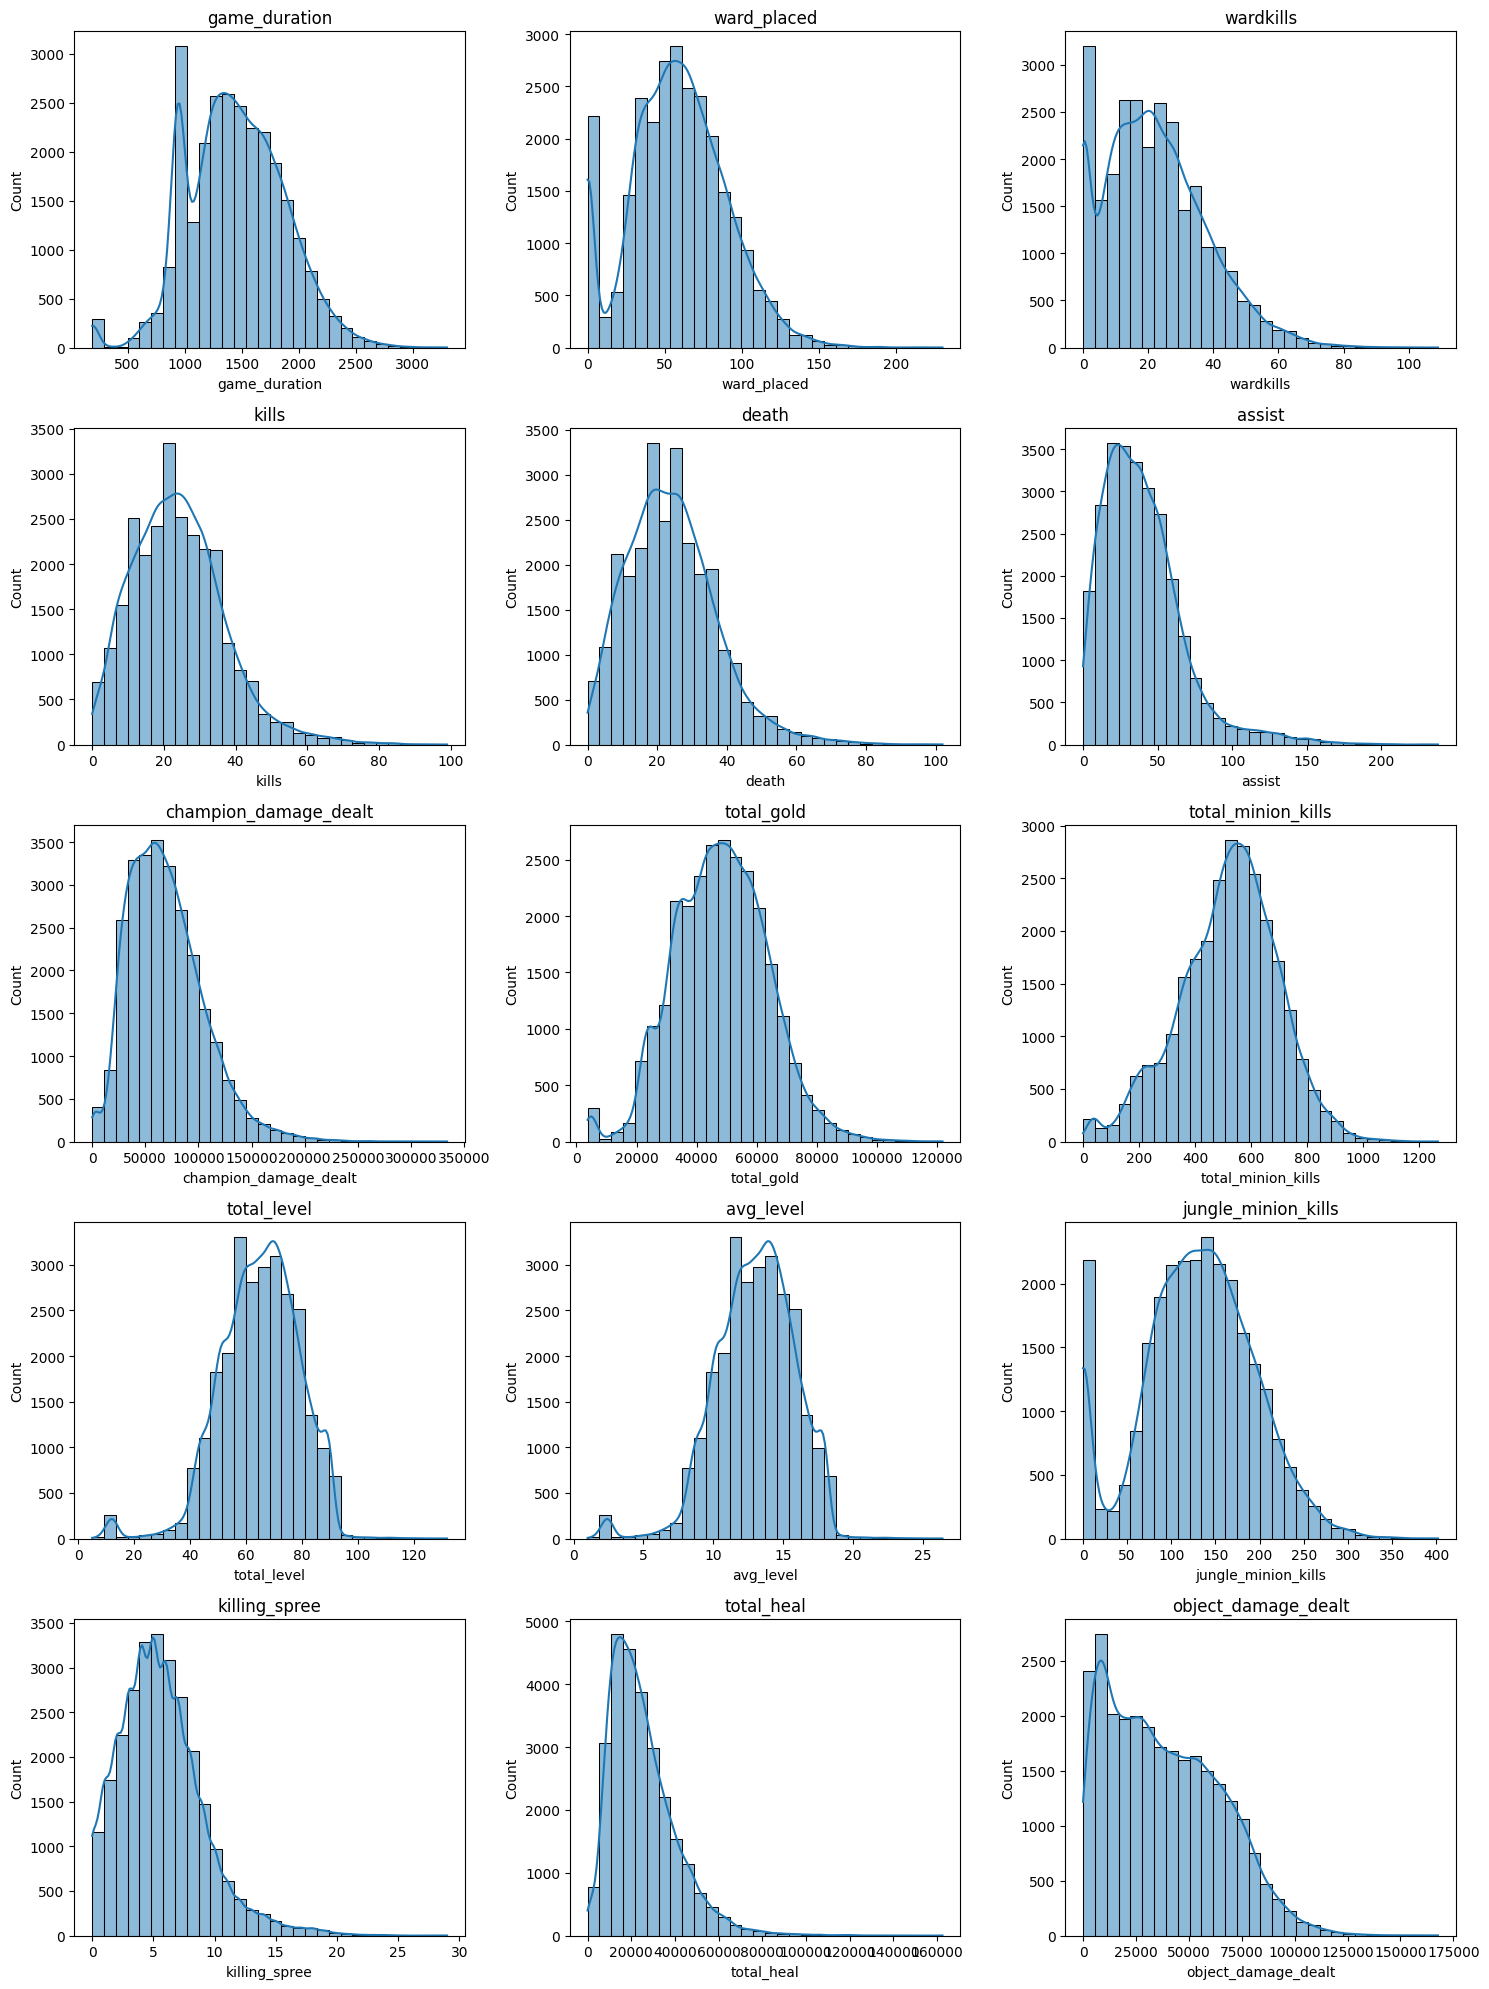

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

exclude_cols = ['game_id', 'wins', 'dragon_kills', 'baron_kills', 'tower_kills', 'inhibitor_kills', 'first_blood', 'first_tower', 'first_baron', 'first_dragon', 'first_inhibitor']

numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

### Insights

### **1. Game Duration**
- The distribution is right-skewed, with most games ending between 1000 and 2000 seconds (~16–33 minutes), but a notable number of games are much shorter or longer.
- **Insight:** Most matches are of average length, but there are some very short (potential stomps) and some very long (close or drawn-out) games.

---

### **2. Vision Metrics (ward_placed, wardkills)**
- Both metrics are right-skewed, with most games having a moderate number of wards placed/killed, but a long tail of games with high vision activity.
- **Insight:** While vision control is generally consistent, some games see much higher warding, possibly reflecting more competitive or longer matches.

---

### **3. Kills, Deaths, Assists**
- All three are right-skewed, with most games having a moderate number of kills, deaths, and assists, but a few games with very high values.
- **Insight:** Most games are balanced in terms of combat, but some matches are highly one-sided or involve a lot of teamfighting, leading to high kill/assist counts.

---

### **4. Champion Damage Dealt**
- Strong right skew, with most games having moderate damage and a few with extremely high values.
- **Insight:** Most games have typical damage output, but some matches (likely longer or more intense) result in much higher damage dealt.

---

### **5. Total Gold**
- The distribution is approximately normal (bell-shaped), centered around 40,000–60,000 gold.
- **Insight:** Most games result in similar total gold earned, but there are outliers with much higher or lower gold, likely corresponding to very short or long games.

---

### **6. Total Minion Kills, Jungle Minion Kills**
- Both are right-skewed, with most games having moderate minion/jungle minion kills, but a long tail of games with high farming.
- **Insight:** Farming is generally consistent, but some games allow for much higher minion/jungle minion accumulation, possibly due to longer duration or snowballing.

---

### **7. Level Metrics (total_level, avg_level)**
- Both are roughly normal, peaking around 60–80 for total level and 12–16 for average level.
- **Insight:** Most teams reach similar levels by the end of the game, with few games where teams are much lower or higher leveled.

---

### **8. Killing Spree**
- Right-skewed, with most games having a low number of killing sprees, but some with much higher.
- **Insight:** While most games see a few killing sprees, some matches have players who go on significant streaks, indicating snowballing or dominant performances.

---

### **9. Total Heal**
- Strong right skew, with most games having moderate healing and a few with very high healing.
- **Insight:** Healing is usually moderate, but in some games (possibly with specific champions or longer duration), healing can be extremely high.

---

### **10. Object Damage Dealt**
- Right-skewed, with most games having moderate object damage, but a long tail of games with high values.
- **Insight:** Most teams deal a typical amount of damage to objectives, but some games involve much more focus on objectives, possibly reflecting strategic play or longer games.

---

## **General Patterns**
- **Right-skewed distributions** are common, indicating that while most games are “average,” there are frequent outliers—games that are much more intense, longer, or one-sided.
- **Normal-like distributions** (total_gold, levels) suggest that some aspects of team performance are more consistent across games.
- **Outliers** in almost every metric suggest that a subset of games are either very short (stomps) or very long (close, drawn-out matches).

### Correlation between red winning and other factors

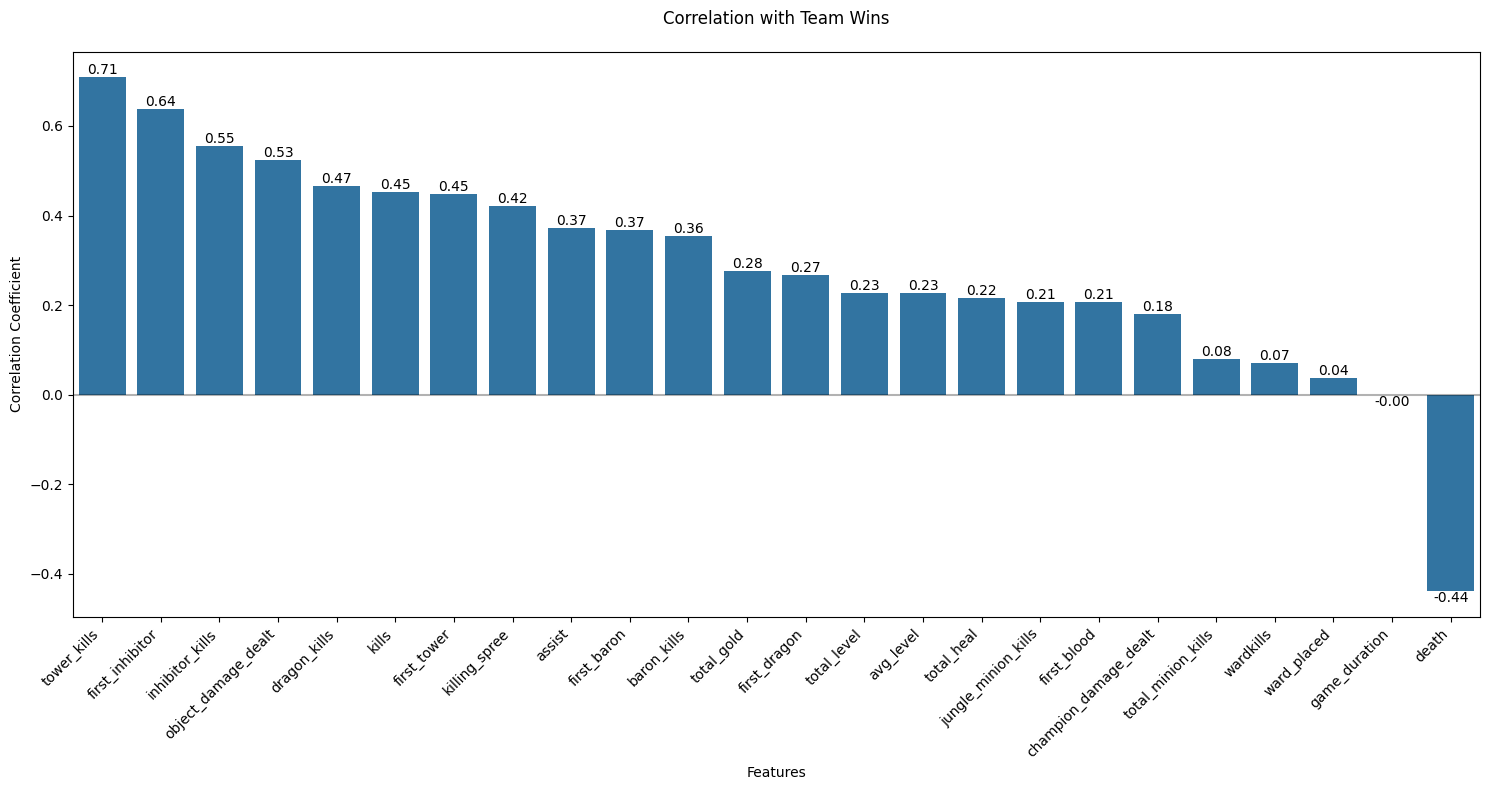

In [13]:
exclude_cols = ['game_id', 'wins']

# Get correlations
correlations = df.corr()['wins'].sort_values(ascending=False)
correlations = correlations.drop(exclude_cols)

# Create a more detailed visualization
plt.figure(figsize=(15, 8))
sns.barplot(x=correlations.index, y=correlations.values)

# Customize the plot
plt.title('Correlation with Team Wins', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values on top of bars
for i, v in enumerate(correlations.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

plt.tight_layout()

* The most correlated factor is tower kills for both team to win
* the least correlated factor is game duration

### Data Split

In [14]:
from sklearn.model_selection import train_test_split

# Define features X and target y
X = df.drop(['game_id', 'wins'], axis=1)  # all columns except target and red wins
y = df['wins']  # target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 22% for testing
    random_state=42 
)

X_train.head()

,game_duration,first_blood,first_tower,first_baron,first_dragon,first_inhibitor,dragon_kills,baron_kills,tower_kills,inhibitor_kills,...,assist,champion_damage_dealt,total_gold,total_minion_kills,total_level,avg_level,jungle_minion_kills,killing_spree,total_heal,object_damage_dealt
10505,1311,1,1,0,1,1,3,0,7,1,...,56,90493,50826,508,67,13.4,146,7,27841,55370
25187,1309,0,0,0,0,0,0,0,1,0,...,10,31048,37875,521,56,11.2,100,1,13469,14153
16444,921,1,1,0,1,0,2,0,4,0,...,23,32597,32520,391,53,10.6,108,4,15535,29692
2450,1947,0,1,1,0,0,0,1,3,0,...,25,59959,57842,812,74,14.8,157,5,33479,41345
5940,1371,0,0,0,1,0,1,0,1,0,...,29,47957,38990,491,59,11.8,117,4,20327,14198


## Data Cleaning

### Missing and duplicates values

In [15]:
print(f"Missing values in the dataset: {df.isnull().sum()}")
print(f"Duplicates in the dataset: {df.duplicated().sum()}")

# Drop duplicates
df = df.drop_duplicates()

# Check again for duplicates
print(f"After dropping duplicates, Duplicates in the dataset: {df.duplicated().sum()}")

Missing values in the dataset: game_id                  0
game_duration            0
wins                     0
first_blood              0
first_tower              0
first_baron              0
first_dragon             0
first_inhibitor          0
dragon_kills             0
baron_kills              0
tower_kills              0
inhibitor_kills          0
ward_placed              0
wardkills                0
kills                    0
death                    0
assist                   0
champion_damage_dealt    0
total_gold               0
total_minion_kills       0
total_level              0
avg_level                0
jungle_minion_kills      0
killing_spree            0
total_heal               0
object_damage_dealt      0
dtype: int64
Duplicates in the dataset: 56
After dropping duplicates, Duplicates in the dataset: 0


* We've removed the 56 duplicatees to not introduce bias into the model.

### Outliers

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape
df_out.head()

,game_id,game_duration,wins,first_blood,first_tower,first_baron,first_dragon,first_inhibitor,dragon_kills,baron_kills,...,assist,champion_damage_dealt,total_gold,total_minion_kills,total_level,avg_level,jungle_minion_kills,killing_spree,total_heal,object_damage_dealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,4247155821,1317,1,0,0,0,1,0,2,0,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,4243963257,932,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
5,4241394461,1567,1,1,1,0,0,1,2,0,...,43,59839,52221,576,66,13.2,171,9,40925,51855
6,4233222221,1686,0,0,1,0,0,0,0,0,...,30,70270,47107,601,65,13.0,136,5,20503,31788


Those aren't really outliers according to our experience.

### Data Types

In [17]:
df.dtypes

game_id                    int64
game_duration              int64
wins                       int64
first_blood                int64
first_tower                int64
first_baron                int64
first_dragon               int64
first_inhibitor            int64
dragon_kills               int64
baron_kills                int64
tower_kills                int64
inhibitor_kills            int64
ward_placed                int64
wardkills                  int64
kills                      int64
death                      int64
assist                     int64
champion_damage_dealt      int64
total_gold                 int64
total_minion_kills         int64
total_level                int64
avg_level                float64
jungle_minion_kills        int64
killing_spree              int64
total_heal                 int64
object_damage_dealt        int64
dtype: object

All the data types match the corresponding feature

### Normalizations for non binary values

Why is it imortant to normalize non binary values?
* We'll be using LDA for feature reduction and SVM for classifying if the blue team wins or not
* LDA:
  1. Is sensitive to the scale of features
  2. Works best when features are normalized
* SVM:
  1. is very sensitive to the scale of features
  2. uses distance-based calculations
  3 performs better with normalized values

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# separate binary features (they don't need normalization)
binary_cols = ['first_blood', 'first_tower', 'first_baron', 'first_dragon', 'first_inhibitor']

# get numerical features (excluding binary features)
numerical_features = [col for col in X_train.columns if col not in binary_cols]

# initialize scalers
standard_scaler = MinMaxScaler() # Since the data is not all normaly distributed, we'll use MinMaxScaler

# Fit and transform the training data
X_train_normalized = X_train.copy()
X_train_normalized = standard_scaler.fit_transform(X_train)

# Transform the test data using the same scalers
X_test_normalized = X_test.copy()
X_test_normalized = standard_scaler.transform(X_test)

## Dimensionality Reduction

We'll be using LDA since this is a classification problem (the dataset is labeled)

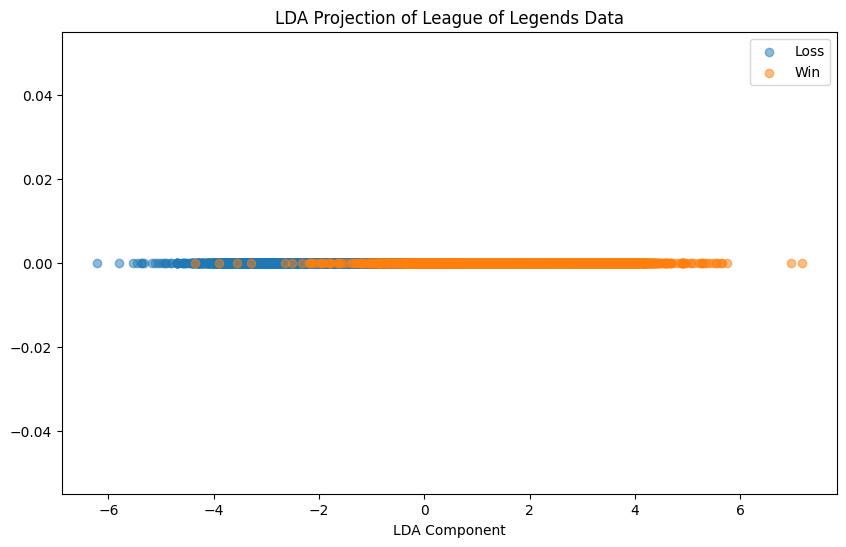

<Figure size 1200x600 with 0 Axes>

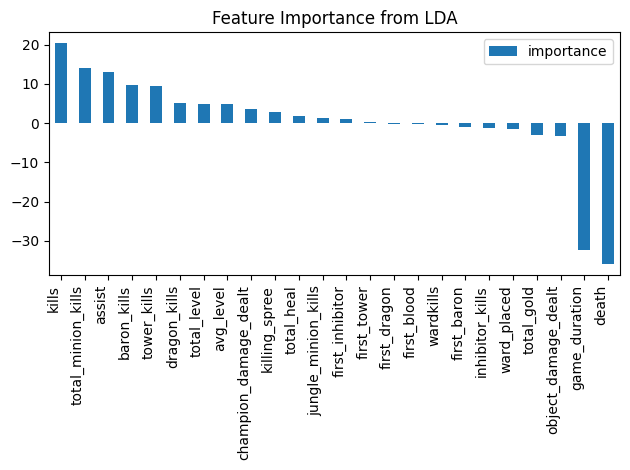

The important features are: ['kills', 'total_minion_kills', 'assist', 'baron_kills', 'tower_kills', 'dragon_kills', 'game_duration', 'death']

Number of features before selection: 24
Number of features after selection: 8


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # for binary classification, we use 1 component
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

# visualize the LDA transformation
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), 
            label='Loss', alpha=0.5)
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), 
            label='Win', alpha=0.5)
plt.title('LDA Projection of League of Legends Data')
plt.xlabel('LDA Component')
plt.legend()
plt.show()

# analyze feature importance
feature_importance = pd.DataFrame(
    lda.coef_[0],
    index=X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from LDA')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Select features based on importance threshold
# You can adjust this threshold based on your needs
importance_threshold = 5  # This means we'll keep features that contribute at least 1% to the discrimination
important_features = feature_importance[abs(feature_importance['importance']) > importance_threshold].index
print(f"The important features are: {important_features.tolist()}")

print(f"\nNumber of features before selection: {X_train.shape[1]}")
print(f"Number of features after selection: {len(important_features)}")


### LDA Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2662
           1       0.97      0.96      0.97      2719

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381



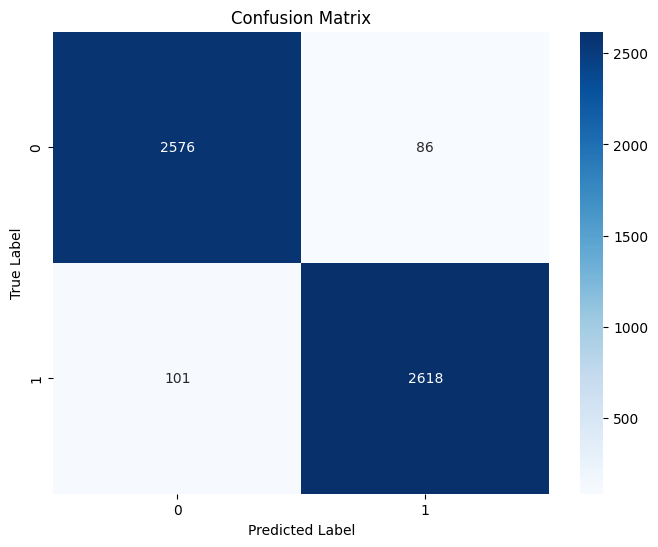

In [36]:
# Create a simple classifier using LDA
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_normalized, y_train)
y_pred = lda_classifier.predict(X_test_normalized)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## SVM

### Hyperparameter Tuning

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Example parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM
svm = SVC()

# Grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9696139290787491


### SVM Model

In [38]:
from sklearn.svm import SVC

svm = SVC(C=10, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train_normalized, y_train)
y_pred = svm.predict(X_test_normalized)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2662
           1       0.97      0.97      0.97      2719

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381



### Model Evaluation

Accuracy: 0.9739825311280431
Precision: 0.9749539594843463
Recall: 0.9735196763515999
F1 Score: 0.9742362900257637
Confusion Matrix:
 [[2594   68]
 [  72 2647]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2662
           1       0.97      0.97      0.97      2719

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381



Text(0.5, 36.72222222222221, 'Predicted Label')

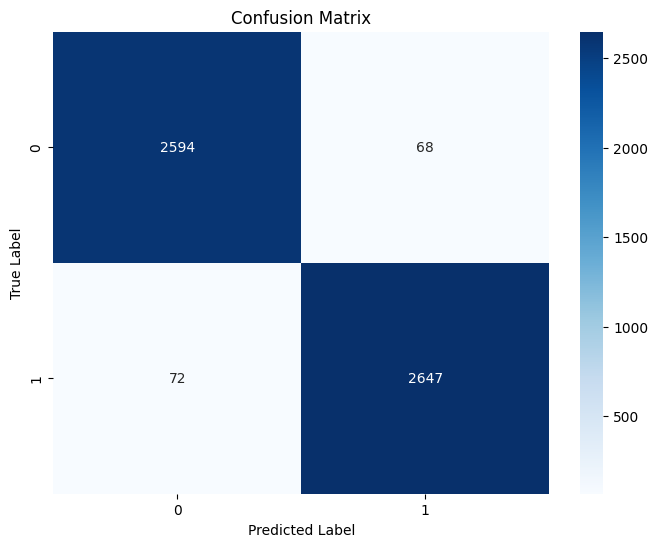

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Use the best estimator from grid search
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_normalized)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## Final Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# build the base pipeline
base_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=None)),  # or set n_components as needed
    ('feature_select', SelectFromModel(LinearDiscriminantAnalysis(), threshold='median'))  # or your threshold
])

# fit the base pipeline to the training data
X_train_transformed = base_pipeline.fit_transform(X_train, y_train)
X_test_transformed = base_pipeline.transform(X_test)

# hyperparameter tuning on SVM using only the most important features
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train_transformed, y_train)

# build the final pipeline with the best SVM params
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=None)),
    ('feature_select', SelectFromModel(LinearDiscriminantAnalysis(), threshold='median')),
    ('svm', SVC(**grid.best_params_))
])

final_pipeline.fit(X_train, y_train)

y_pred = final_pipeline.predict(X_test)